# Prediction Using Supervised ML - Disha Kapoor

## To predict the score if a student studies for 9.25 hrs/day

### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

### Load the data

In [2]:
data =  pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualisation

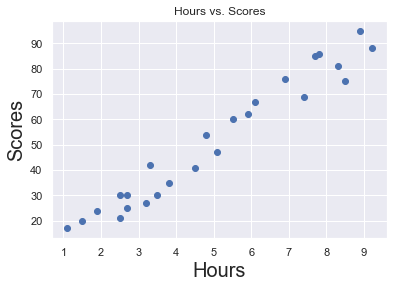

In [4]:
#Explore the data using scatter plot
plt.scatter(data["Hours"],data["Scores"])
plt.xlabel("Hours",fontsize = 20)
plt.ylabel("Scores",fontsize = 20)
plt.title("Hours vs. Scores")
plt.show()

In [5]:
# A clear positive linear relation is observed between the hours studied and the percentage of the scores

### Starting with the Regression Model 

In [6]:
# To create the regression we will first define the dependent and independent variables i.e targets and features
x = data["Hours"]
y = data["Scores"]

In [7]:
# Converting the feature x into a matrix(2D object)
x = x.values.reshape(-1,1)

In [8]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [9]:
# To train the algorithm we make use of simple linear regression
reg =  LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

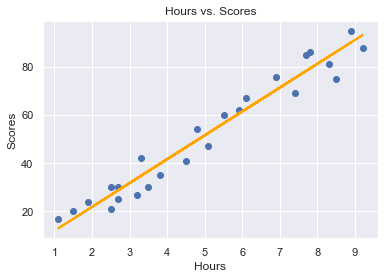

In [10]:
# Creating the regression line and plotting it
line = reg.intercept_ + reg.coef_*x
plt.scatter(x,y)
plt.plot(x,line,lw = 2,c = "orange")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs. Scores")
plt.show()

In [11]:
# Making predictions using the test data
print(x_test)
y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# To compare Actual vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.reset_index(inplace = True)
df

,index,Actual,Predicted
0,5,20,16.884145
1,2,27,33.732261
2,19,69,75.357018
3,16,30,26.794801
4,11,62,60.491033


In [13]:
# To predict the score of  a student who studies 9.25 hrs/day
hours = np.array(9.25)
hours = hours.reshape(-1,1)
prediction = reg.predict(hours)
print("No. of hours studied = " + str(hours[0]))
print("Percentage of scores predicted = " + str(prediction[0]))

No. of hours studied = [9.25]
Percentage of scores predicted = 93.69173248737538


### Evaluating the performance of the Model

In [14]:
reg.score(x,y)

0.9526947647057274

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
